<a href="https://colab.research.google.com/github/the-cryptozoologist/data-science/blob/main/spectral/math_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pascal's Triangle

In [66]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid", {"axis.grid": False})

import math

In [3]:
def triangulator(tri_height):
  PT = np.zeros((tri_height, tri_height), dtype=int)
  for n in range(tri_height):
    for k in range(n+1):
      num = math.factorial(n)
      den = math.factorial(k) * math.factorial(n-k)
      PT[n,k] = num/den
  return(PT)

In [4]:
print(triangulator(9))

[[ 1  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0]
 [ 1  2  1  0  0  0  0  0  0]
 [ 1  3  3  1  0  0  0  0  0]
 [ 1  4  6  4  1  0  0  0  0]
 [ 1  5 10 10  5  1  0  0  0]
 [ 1  6 15 20 15  6  1  0  0]
 [ 1  7 21 35 35 21  7  1  0]
 [ 1  8 28 56 70 56 28  8  1]]


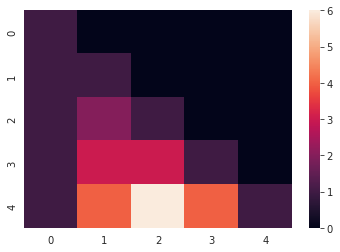

In [16]:
sns.heatmap(triangulator(5))
plt.show()

In [17]:
def print_pascal(tri_height):
  PT = triangulator(tri_height)
  for i in range(tri_height):
    tmp = PT[i,:]
    tmp = tmp[tmp!=0]
    print(" "*(tri_height-i) + np.array2string(tmp)[1:-1])

In [18]:
print_pascal(5)

     1
    1 1
   1 2 1
  1 3 3 1
 1 4 6 4 1


# Euler's Identity

In [19]:
m = 4.3

p = np.pi/4

# euler notation
euler = m * np.exp(1j*p)

# rectangular notation
rect = np.cos(p) + 1j*np.sin(p)

print(f"Euler notation:{euler}\nRectangular notation:{rect}")

Euler notation:(3.0405591591021546+3.040559159102154j)
Rectangular notation:(0.7071067811865476+0.7071067811865475j)


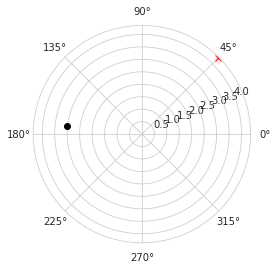

In [20]:
theta = np.angle(euler)
rad = np.abs(euler)

x = np.real(euler)
y = np.imag(euler)

plt.polar(theta, rad, "rx")
plt.plot(x,y, "ko")
plt.show()

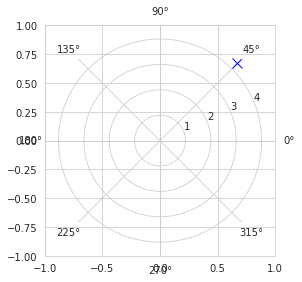

In [21]:
from seaborn.rcmod import axes_style
fig = plt.figure()

ax_cart = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax_polr = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True, frameon=False)

r= ax_polr.get_rmax()

ax_polr.plot(theta,rad, "bx", markersize=10)
ax_cart.plot(x,y,"ro",markersize=10)

ax_cart.set_xlim([-r,r])
ax_cart.set_ylim([-r,r])
ax_cart.set_aspect(1/ax_cart.get_data_ratio())
plt.show()

# Parameterized Gaussian

In [22]:
x = np.linspace(-10,10,1001)

def gaussify(amp, sigma, tau=0):
  numexp = -(x-tau)**2
  return amp / (sigma * np.sqrt(2*np.pi)) * np.exp(numexp / (2 * sigma**2))

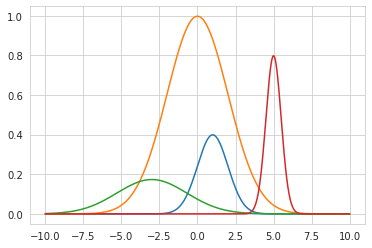

In [23]:
plt.plot(x, gaussify(1,1,1))
plt.plot(x, gaussify(5,2))
plt.plot(x, gaussify(1,2.3,-3))
plt.plot(x, gaussify(1,0.5,5))

plt.show()

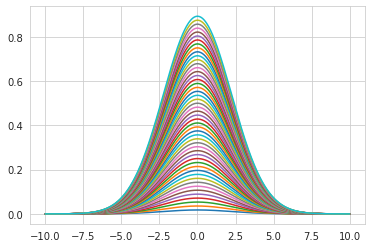

In [24]:
amps = np.linspace(0.1,5,50)

G = np.zeros((len(amps), len(x)))
for i in range(len(amps)):
  G[i,:] = gaussify(amps[i],2.23425)

plt.plot(x,G.T)
plt.show()

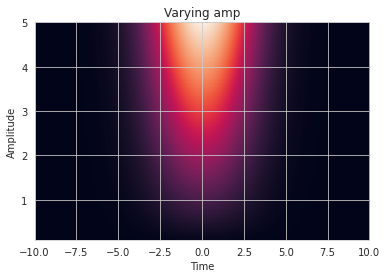

In [25]:
plt.imshow(G, aspect="auto", extent=[x[0],x[-1],amps[0],amps[-1]], origin="lower")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Varying amp")
plt.show()

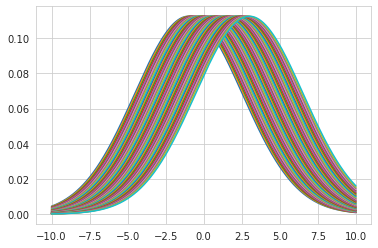

In [26]:
taus = np.linspace(-1,3,50)

G = np.zeros((len(taus), len(x)))
for i in range(len(taus)):
  G[i,:] = gaussify(1,3.54687,taus[i])

plt.plot(x,G.T)
plt.show()

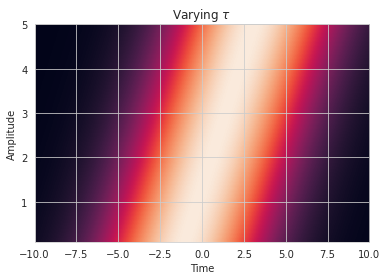

In [27]:
plt.imshow(G, aspect="auto", extent=[x[0],x[-1],amps[0],amps[-1]], origin="lower")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Varying $\\tau$")
plt.show()

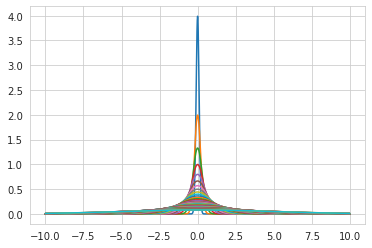

In [28]:
sigmas = np.linspace(0.1,5,50)

G = np.zeros((len(sigmas), len(x)))
for i in range(len(sigmas)):
  G[i,:] = gaussify(1.000001,sigmas[i])

plt.plot(x,G.T)
plt.show()

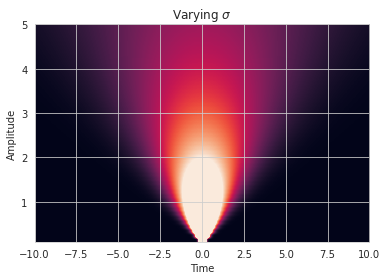

In [29]:
plt.imshow(G, aspect="auto", extent=[x[0],x[-1],amps[0],amps[-1]], 
           origin="lower",
           vmax=0.2)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Varying $\\sigma$")
plt.show()

# Time dilation in special relativity

In [56]:
kph = np.zeros(6)

kph[0] = 100
kph[1] = 200
kph[2] = 900
kph[3] = 11300
kph[4] = 107991
kph[5] = 828000

labels = ["Car", "Autobahn", "Plane", "Satellite", "Earth", "Solar system"]

In [51]:
def time_is_relative(set):
  c = 299792458
  tdil = lambda v : 1 / np.sqrt(1-(v**2/c**2))
  td = np.zeros(len(set))
  for i in range(len(kph)):
    v = kph[i]*1000/3600
    td[i] = tdil(v)
  return td

In [53]:
tdl = time_is_relative(kph)

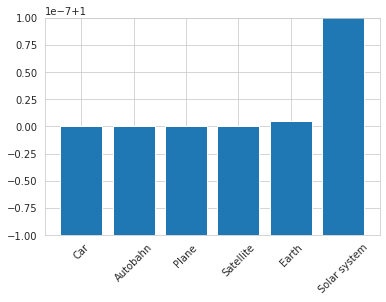

In [59]:
plt.bar(range(len(tdl)), tdl)
plt.ylim([0.9999999, 1.0000001])
plt.xticks(ticks=range(len(tdl)), labels=labels, rotation=45)
plt.show()

# Eigenvalues

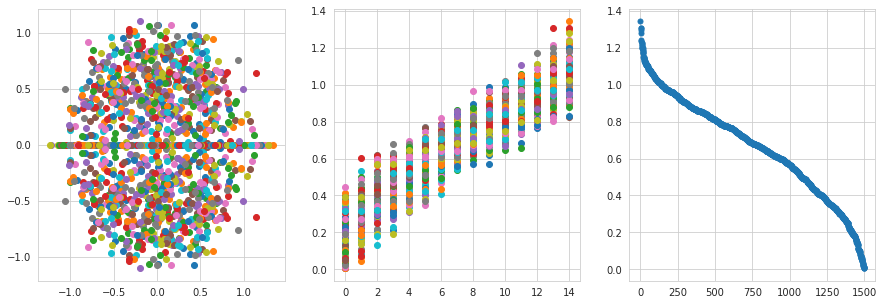

In [89]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

n = 15
mags = []

for i in range(100):
  A = np.random.randn(n,n) / np.sqrt(n)
  L = np.linalg.eig(A)[0]
  mags = np.concatenate((mags,np.abs(L)))
  ax[0].plot(np.real(L), np.imag(L), "o")
  ax[1].plot(np.sort(np.abs(L)), "o")
mags.sort()
ax[2].plot(mags[::-1], "o", markersize=5)

plt.show()

array([-1.07230946+0.j        ,  0.37096024+0.91582724j,
        0.37096024-0.91582724j, -0.78271746+0.j        ,
       -0.2710674 +0.62865807j, -0.2710674 -0.62865807j,
        0.8173466 +0.35833491j,  0.8173466 -0.35833491j,
        0.82552794+0.j        ,  0.68342583+0.j        ,
       -0.371871  +0.j        , -0.24202425+0.094662j  ,
       -0.24202425-0.094662j  ,  0.13095841+0.0258236j ,
        0.13095841-0.0258236j ])